# Exercícios

## 0\. Preparação do ambiente
> Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow
Jones. Os dados estão disponíveis para download neste link. Vamos utilizar o pacote wget
para fazer o download dos dados.

In [1]:
pip install wget==3.2

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e2ea14fd0bce01d4363e397c757b6723f1a9855b4fac9145b627474006cd36d0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import wget

wget.download(
 url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip',
 out='./dados.zip'
)

'./dados (1).zip'

In [6]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

In [8]:
import os 

path = './dados'
file_name = 'dow_jones_index'
file_source = f'{path}/{file_name}.data'
file_destiny = f'{path}/{file_name}.csv'

os.rename(file_source, file_destiny)

## 1\. Pandas

In [9]:
pip install pandas==1.1.5

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(file_destiny)

In [12]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [13]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

In [15]:
lines, columns = df.shape

print(f'Número de linhas: {lines}')
print(f'Número de colunas: {columns}')

Número de linhas: 750
Número de colunas: 16


In [17]:
df_mcd = df[df['stock'] == 'MCD']

In [18]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

In [19]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [21]:
df_mcd.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

In [ ]:
from datetime import datetime as dt

for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

In [ ]:
df_mcd['date'] = df_mcd['date'].apply(lambda value: dt.strptime(value, '%m/%d/%Y'))

In [46]:
df_mcd['date'] = df_mcd['date'].apply(lambda value: value.date())

In [47]:
df_mcd.head(n=10)

,date,open,high,low,close
216,2011-01-07,77.10,77.59,73.59,74.37
217,2011-01-14,74.25,74.49,72.46,74.06
218,2011-01-21,74.65,75.75,74.31,75.01
219,2011-01-28,74.25,75.85,73.05,73.28
220,2011-02-04,73.80,74.50,73.08,74.05
221,2011-02-11,74.13,76.32,73.30,76.14
222,2011-02-18,76.07,76.45,75.70,76.13
223,2011-02-25,75.95,76.45,74.42,74.44
224,2011-03-04,74.51,76.63,73.64,76.03
225,2011-03-11,76.38,77.25,74.97,76.73


In [48]:
df_mcd.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

> Excelente, agora podemos explorar os dados visualmente.
Agora é a sua vez! Conduza o mesmo processo para extrair e tratar os dados da empresa
Coca-Cola ( stock column igual a KO ).

In [49]:
df_ko = df[df['stock'] == 'KO']

In [51]:
df_ko = df_ko[['date', 'open', 'high', 'low', 'close']]

In [52]:
df_ko.head(n=10)

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [53]:
for col in ['open', 'high', 'low', 'close']:
  df_ko[col] = df_ko[col].apply(lambda value: float(value.split(sep='$')[-1]))

df_ko['date'] = df_ko['date'].apply(lambda value: dt.strptime(value, '%m/%d/%Y').date())

In [54]:
df_ko.head(n=10)

,date,open,high,low,close
204,2011-01-07,65.88,65.88,62.56,62.92
205,2011-01-14,62.70,63.86,62.56,63.13
206,2011-01-21,63.21,63.92,62.72,62.77
207,2011-01-28,62.87,63.31,62.14,62.21
208,2011-02-04,62.32,63.48,61.89,62.56
209,2011-02-11,62.67,64.75,62.32,63.57
210,2011-02-18,63.67,64.72,62.55,64.55
211,2011-02-25,63.36,64.40,63.33,64.31
212,2011-03-04,64.17,65.87,63.86,65.21
213,2011-03-11,65.32,65.84,64.47,64.81


In [55]:
df_ko.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

## 2\. Seaborn

In [56]:
pip install seaborn==0.11.1

     |████████████████████████████████| 285 kB 7.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [57]:
import seaborn as sns

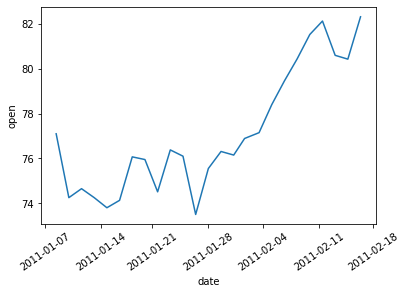

In [103]:
plot = sns.lineplot(data=df_mcd, x='date', y='open')
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=35)

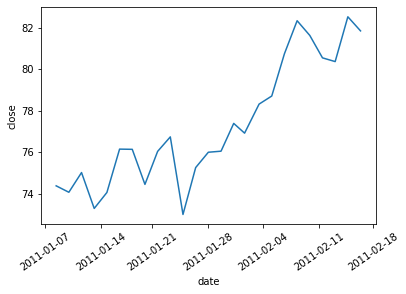

In [104]:
plot = sns.lineplot(x='date', y='close', data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=35)

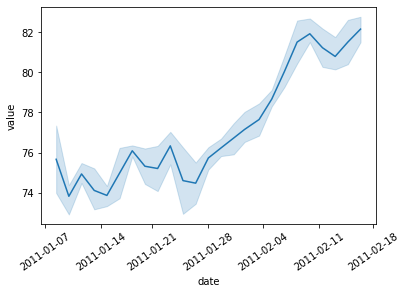

In [68]:
plot = sns.lineplot(
    x='date',
    y='value',
    data=pd.melt(df_mcd, ['date'])
)

_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=35)

In [69]:
plot.figure.savefig('./mcd.png')

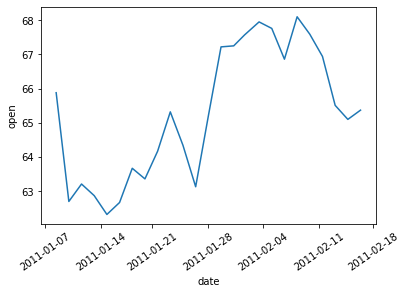

In [71]:
plot = sns.lineplot(x='date', y='open', data=df_ko)
_ = plot.set_xticklabels(labels=df_ko['date'], rotation=35)

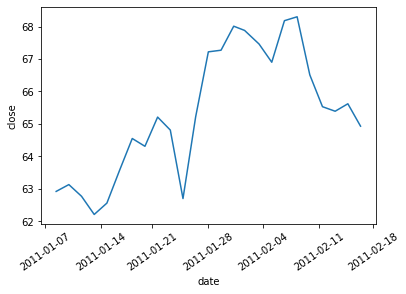

In [72]:
plot = sns.lineplot(x='date', y='close', data=df_ko)
_ = plot.set_xticklabels(labels=df_ko['date'], rotation=35)

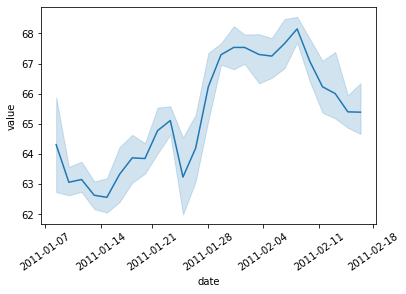

In [116]:
plot = sns.lineplot(
    x='date',
    y='value',
    data=pd.melt(df_ko, ['date'])
)

_ = plot.set_xticklabels(labels=df_ko['date'], rotation=35)

In [105]:
plot.figure.savefig('./ko.png')

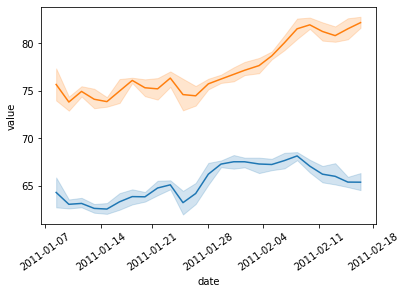

In [117]:
plot = sns.lineplot(
    x='date',
    y='value',
    data=pd.melt(df_ko, ['date'])
)

_ = plot.set_xticklabels(labels=df_ko['date'], rotation=35)

plot = sns.lineplot(
    x='date',
    y='value',
    data=pd.melt(df_mcd, ['date'])
)

_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=35)

# Insight

Fazendo uma análise nessas imagens mesmo a coca-cola sendo um produto comercializado mundialmente pelo mcdonalds não podemos inferir que só porque o macdonalds está fechando com uma cotação maior que a coca cola vai acompanhar a tendencia, o que me leva a crer que nem todos os clientes do mcdonalds tomam coca-cola. 

ao meu ver também enquanto o consumo no mcdonalds aumentou o da cocacola teve um leve crescimento acompanhando um pouco a subida do consumo no mcdonalds de 2011-01-28 a 2011-02-11 mas depois voltou a baixar.